In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Library and extern Repositories

In [2]:
import sys
import os

library_paths = ['.']


for p in library_paths:
    if p not in sys.path:
        sys.path.append(p)

print(sys.path)

['/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '.']


# Scrap Pinterest Images

In [ ]:
!pip install pinscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pinscrape import pinscrape

In [ ]:
details = pinscrape.scraper.scrape("realistic anime male", "/content/drive/MyDrive/data/_kathi/face-reco/unknown2/", {}, 10)

if details["isDownloaded"]:
    print("\nDownloading completed !!")
    print(f"\nTotal urls found: {len(details['extracted_urls'])}")
    print(f"\nTotal images downloaded (including duplicate images): {len(details['url_list'])}")
    print(details)
else:
    print("\nNothing to download !!")



Total urls found: 9

Total images downloaded (including duplicate images): 194
{'isDownloaded': True, 'url_list': ['https://i.pinimg.com/originals/90/ec/09/90ec09beae2a7bca5a7a2d0ae3552804.png', 'https://i.pinimg.com/originals/70/cf/56/70cf561500d45b73d6ee8b45505c2f79.jpg', 'https://i.pinimg.com/originals/42/0a/3d/420a3d1ed2f9de41d4044923e8c6c647.jpg', 'https://i.pinimg.com/originals/e6/dc/59/e6dc59e2238207ef499c09c7a29fac46.jpg', 'https://i.pinimg.com/originals/4d/e6/14/4de614b154644eee45025a16e9f86135.jpg', 'https://i.pinimg.com/originals/a5/5d/d3/a55dd37ff661e8b181312ee889fc780a.jpg', 'https://i.pinimg.com/originals/62/88/c5/6288c5d0ac2a18e2b01ee42ceca5c7f7.jpg', 'https://i.pinimg.com/originals/4c/97/ce/4c97ce5951f034d5d35f1ade75071536.jpg', 'https://i.pinimg.com/originals/83/d6/46/83d646f96b7a6febefe4fff2fdc0586b.jpg', 'https://i.pinimg.com/originals/50/9f/be/509fbe4bd2709ed864b1dc867ebe72ad.jpg', 'https://i.pinimg.com/originals/26/8e/4b/268e4bb8caaa3dd30dd3a717c0b25454.jpg', 'ht

# Crop Image with Face Detection

In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import face_recognition
import cv2
import matplotlib.pyplot as plt

In [ ]:
folder = '/content/drive/MyDrive/data/_kathi/face-reco/unknown/'

for filename in os.listdir(folder):
  path = os.path.join(folder, filename)
  img = cv2.imread(path)
  if img is not None:
    try:
      face_locations = face_recognition.face_locations(img)
      face_img = img.copy()
      

      cropped = []
      for top, right, bottom, left in face_locations:
        offset = int((bottom-top)*0.1)
        top -= int(offset*3)
        bottom += offset
        left -= int(offset*2)
        right += int(offset*2)

        cv2.rectangle(face_img, (left, top), (right, bottom), (0,255,0), 2)
        cropped = img[top:bottom, left:right]

        cv2.imwrite(f'/content/drive/MyDrive/data/_kathi/face-reco/ghibli/{filename}', cropped)
        os.remove(path)
        print('success: ', filename)
    except:
      print('failed: ', filename)


#plt.axis('off')
#plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
#plt.show()

success:  e92fc5e8319dbc6d5c61070a6d464ed9.jpg
success:  05801b49da95de76079c564643da914b.jpg
success:  7fa56f87166cbe92aaeb01f906a673eb.jpg
success:  447ea69f8743e8aa971579c07b31c962.jpg
success:  22d7475ab692720b75457f7b23d2f812.jpg
success:  9d32d355dcee1e8b2d024042b5c4a7c4.jpg
success:  1fe931f8583c3859c86d530460faac3c.jpg


#Crop from Video

In [ ]:
!pip install face_recognition
import face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=60336367ccdd5b341a3a40f27418d2eadf87f5a360d8a362a86b3a826a3de159
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [3]:
import cv2
import matplotlib.pyplot as plt
from IPython import display
import numpy as np

%matplotlib inline


In [4]:
!pip install openmim
!mim install mmcv-full
!mim install mmdet
!mim install mmpose

!pip install anime-face-detector 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.1 MB/s 
     |████████████████████████████████| 237 kB 10.5 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 43.7 MB 13.0 MB/s 
     |████████████████████████████████| 190 kB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
     |████████████████████████████████| 1.4 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.ht

In [5]:
from anime_face_detector import create_detector

In [6]:
detector = create_detector('yolov3')

  0%|          | 0.00/235M [00:00<?, ?B/s]

  0%|          | 0.00/37.5M [00:00<?, ?B/s]

load checkpoint from local path: /root/.cache/torch/hub/checkpoints/mmpose_anime-face_hrnetv2.pth
load checkpoint from local path: /root/.cache/torch/hub/checkpoints/mmdet_anime-face_yolov3.pth


In [7]:
movie_name = 'poppy_hill'
path = f'/content/drive/MyDrive/repos/art-style-challenge/data/videos/{movie_name}.move'
#path = '/content/drive/MyDrive/repos/art-style-challenge/data/videos/IMG_7648.MOV'
os.path.exists(path)

True

In [8]:
#detector = create_detector('yolov3')

def make_square(top, left, bottom, right):
  offset = int((bottom-top)*0.1)
  top = int(top - offset*3)
  bottom = int(bottom + offset)
  left = int(left - offset*2)
  right = int(right + offset*2)

  height = bottom-top
  width = right-left 
        
  if width < height:
    diff = height - width
    if  diff % 2:
      bottom += 1
      left -= int(np.ceil(diff/2))
      right += int(np.ceil(diff/2))
    else:
      left -= int(diff/2)
      right += int(diff/2)

  elif (height < width):
    diff = width - height
    if  diff % 2:
      right += 1
      top -= int(np.ceil(diff/2))
      bottom += int(np.ceil(diff/2))
    else:
      top -= int(diff/2)
      bottom += int(diff/2) 

  return top, left, bottom, right

In [9]:
if os.path.exists(f'/content/{movie_name}') == False:
  os.mkdir(f'/content/{movie_name}')

outdir = f'/content/{movie_name}'

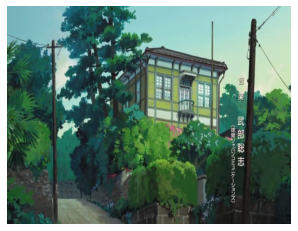

In [11]:
#outdir = f'/content/drive/MyDrive/repos/art-style-challenge/data/faces'
cap = cv2.VideoCapture(path)

count = 0
img_counter = 0 #start_frame = 0

#cap.set(1, start_frame)

if (cap.isOpened() == False):
  print('upsi')

while cap.isOpened():
  ret, frame = cap.read()

  if not ret:
    pass

  elif count==0:
    try:
      face_img = frame.copy()

      # show current frame
      plt.axis('off')
      plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
      display.display(plt.gcf())
      display.clear_output(wait=True)

      face_locations = []
      face = detector(frame)[0]
      face_locations.append(tuple(face['bbox']))

      for left, top, right, bottom, conf in face_locations:
        if conf >= 0.85:
          # add offset for better cropping
          top, left, bottom, right = make_square(top, left, bottom, right)
          # crop and save
          cropped = frame[top:bottom, left:right]

          if right-left >= 150:
            cv2.imwrite(f'{outdir}/{img_counter}.jpg', cropped)
            img_counter += 1

      #face_locations = face_recognition.face_locations(face_img)

      #for top, right, bottom, left in face_locations:
      #  offset = int((bottom-top)*0.15)
      #  top -= int(offset*3)
      #  bottom += offset
      #  left -= int(offset*2)
      #  right += int(offset*2)

        # add rectangle to visualize
          #cv2.rectangle(frame, (left, top), (right, bottom), (0,255,0), 2)

      


      # display results
      #plt.axis('off')
      #plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
      #display.display(plt.gcf())
      #display.clear_output(wait=True)

    except KeyboardInterrupt:
      break
    except:
      pass

    count = 60*2

  else:
    count -= 1
  
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()



In [ ]:
format = f'{movie_name}.zip'

!zip -r /content/$format /content/$movie_name
!mv /content/$format /content/drive/MyDrive/repos/art-style-challenge/data

In [51]:
dir = f'/content/drive/MyDrive/repos/art-style-challenge/data/{movie_name}'
if os.path.exists(dir) == False:
  os.mkdir(dir)

!unzip /content/drive/MyDrive/repos/art-style-challenge/data/$format -d $dir

Archive:  /content/drive/MyDrive/repos/art-style-challenge/data/ocean_waves.zip
   creating: /content/drive/MyDrive/repos/art-style-challenge/data/ocean_waves/content/ocean_waves/
  inflating: /content/drive/MyDrive/repos/art-style-challenge/data/ocean_waves/content/ocean_waves/1082.jpg  
  inflating: /content/drive/MyDrive/repos/art-style-challenge/data/ocean_waves/content/ocean_waves/156.jpg  
  inflating: /content/drive/MyDrive/repos/art-style-challenge/data/ocean_waves/content/ocean_waves/1032.jpg  
  inflating: /content/drive/MyDrive/repos/art-style-challenge/data/ocean_waves/content/ocean_waves/972.jpg  
  inflating: /content/drive/MyDrive/repos/art-style-challenge/data/ocean_waves/content/ocean_waves/1073.jpg  
  inflating: /content/drive/MyDrive/repos/art-style-challenge/data/ocean_waves/content/ocean_waves/512.jpg  
  inflating: /content/drive/MyDrive/repos/art-style-challenge/data/ocean_waves/content/ocean_waves/807.jpg  
  inflating: /content/drive/MyDrive/repos/art-style-ch

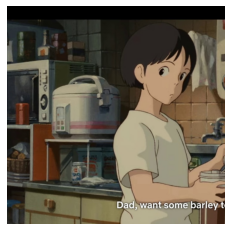

[(436.14847, 139.0656, 616.43896, 344.53577, 0.982489)]
0.982489
dim:  180.2905 205.47017
dim:  286 286
(286, 286, 3)


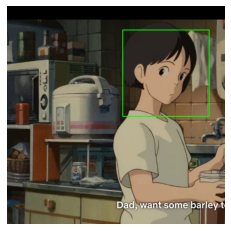

[(81, 201, 236, 46)]


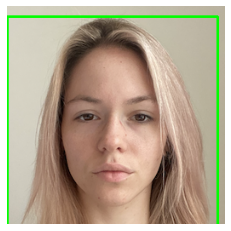

In [ ]:
image = cv2.imread('/content/drive/MyDrive/data/_kathi/ghibli/Starlight_Sophie.jpg')
image = cv2.imread('/content/drive/MyDrive/repos/art-style-challenge/data/faces/6.jpg')
image2 = cv2.imread('/content/drive/MyDrive/data/_kathi/target/4.png')
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

preds = detector(image)

def make_square(top, left, bottom, right):
  offset = int((bottom-top)*0.1)
  top = int(top - offset*3)
  bottom = int(bottom + offset)
  left = int(left - offset*2)
  right = int(right + offset*2)

  height = bottom-top
  width = right-left
        
  if width < height:
    diff = height - width
    if  diff % 2:
      bottom += 1
      left -= int(np.ceil(diff/2))
      right += int(np.ceil(diff/2))
    else:
      left -= int(diff/2)
      right += int(diff/2)

  elif (height < width):
    diff = width - height
    if  diff % 2:
      right += 1
      top -= int(np.ceil(diff/2))
      bottom += int(np.ceil(diff/2))
    else:
      top -= int(diff/2)
      bottom += int(diff/2) 

  return top, left, bottom, right

if len(preds):
  preds = detector(image)[0]
  loc = []
  loc.append(tuple(preds['bbox']))

  print(loc)
  for left, top, right, bottom, nani in loc:
        print(nani)
        # add offset for better cropping
        print('dim: ', right-left, bottom-top)
        top, left, bottom, right = make_square(top, left, bottom, right)
        print('dim: ', right-left, bottom-top)

        # add rectangle to visualize
        cv2.rectangle(image, (left, top), (right, bottom), (0,255,0), 2)
        cropped = image[top:bottom, left:right]
        print(cropped.shape)

plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

face_locations = face_recognition.face_locations(image2)
print(face_locations)

for top, right, bottom, left in face_locations:
        # add offset for better cropping
        offset = int((bottom-top)*0.15)
        top -= int(offset*3)
        bottom += offset
        left -= int(offset*2)
        right += int(offset*2)

        # add rectangle to visualize
        cv2.rectangle(image2, (left, top), (right, bottom), (0,255,0), 2)

#for top, right, bottom, left in preds['bbox']:
#  print('top', top)
#        # add offset for better cropping
#        offset = int((bottom-top)*0.15)
#        top -= int(offset*3)
#        bottom += offset
#        left -= int(offset*2)
#        right += int(offset*2)

        # add rectangle to visualize
#        cv2.rectangle(image, (left, top), (right, bottom), (0,255,0), 2)

plt.axis('off')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.show()